<a href="https://colab.research.google.com/github/TasosTheodoropoulos/Photoz_SDSS/blob/main/CNN_Photoz_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

Clone GitHub [repository](https://github.com/TasosTheodoropoulos/Photoz_SDSS) and install dependencies

Remember to connect to a GPU runtime in order to train the CNN model

In [ ]:
!pip -q install mpl_scatter_density sklearn wget;
!git clone https://github.com/TasosTheodoropoulos/Photoz_SDSS.git;  # clone
%cd Photoz_SDSS

     |████████████████████████████████| 655 kB 12.4 MB/s 
     |████████████████████████████████| 52 kB 449 kB/s 
Cloning into 'Photoz_SDSS'...
remote: Enumerating objects: 82, done.
remote: Total 82 (delta 0), reused 0 (delta 0), pack-reused 82
Unpacking objects: 100% (82/82), done.
/content/Photoz_SDSS


In [ ]:
import numpy as np
import tensorflow as tf
from  Photo_z_lib import *
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import gc
from sklearn.model_selection import train_test_split
import wget

#Importing the dataset

Loading data from the github repository 

Minimal amount of data (Not useful for training just for testing) 

In [ ]:
images_ex = np.load('images_example.npy')
labels_ex = np.load('labels_example.npy')

## Loading data from my public google drive folder

(Larger amount of data still only jpeg images containg minimal information)

Better for training

Downloading from my google drive shared folder

In [ ]:
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1HVp4VP169ZHBp2gjcL1hJFFTZxRoYA2Q' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1HVp4VP169ZHBp2gjcL1hJFFTZxRoYA2Q" -O images.npy && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1b7-LWQ3njN7LYzz_z1bhOCqYSGAMGu2c' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1b7-LWQ3njN7LYzz_z1bhOCqYSGAMGu2c" -O labels.npy && rm -rf /tmp/cookies.txt

In [ ]:
images = np.load('images.npy')
labels = np.load('labels.npy')

Other useful datasets (large amount of data difficult to work in Colab)

* as h5 files.

  Website: https://portal.nersc.gov/project/dasrepo/self-supervised-learning-sdss/dataset.html

* as npz file:

  Website: https://biprateep.de/encapZulate-1/data.html

##Initialisation

Choosing the number of classes (redshift bins), maximum redshift of the dataset (only used in the plots)

In [ ]:
Nbins = 150
red_max = 0.4

Dividing the data into training and test datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)

Shape of the training dataset (# of data, # of x pixels, # of y pixels, # of filters e.g. 3 for rgb images)

In [ ]:
np.shape(X_train)

(58962, 64, 64, 3)

Showing an RGB picture of a galaxy

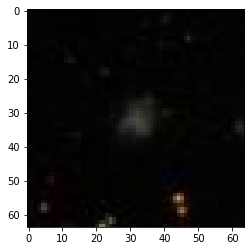

In [ ]:
plt.imshow(X_train[420])

Making the classes, building and training the model and showing some simple results and plots for visual confirmation that it is working well

First argument chooses the model type:
*   'seq' for simple sequential CNN
*   'Pasquet' for GoogleNet architecture using Inception modules used in this [paper](https://arxiv.org/abs/1806.06607)

Using monitor = 'loss', monitors the loss function and stops the training process when it does not improve after 5 epochs.

Then, outputs the model with the lowest loss function after these last epochs.




Epoch 1/100
369/369 - 59s - loss: 3.2660 - accuracy: 0.0847 - val_loss: 3.0252 - val_accuracy: 0.1003 - 59s/epoch - 160ms/step
Epoch 2/100
369/369 - 49s - loss: 2.9816 - accuracy: 0.1031 - val_loss: 2.9246 - val_accuracy: 0.1081 - 49s/epoch - 132ms/step
Epoch 3/100
369/369 - 48s - loss: 2.9222 - accuracy: 0.1136 - val_loss: 2.9334 - val_accuracy: 0.1117 - 48s/epoch - 129ms/step
Epoch 4/100
369/369 - 47s - loss: 2.8679 - accuracy: 0.1159 - val_loss: 2.9172 - val_accuracy: 0.1113 - 47s/epoch - 128ms/step
Epoch 5/100
369/369 - 48s - loss: 2.8482 - accuracy: 0.1210 - val_loss: 2.9255 - val_accuracy: 0.1093 - 48s/epoch - 131ms/step
Epoch 6/100
369/369 - 47s - loss: 2.8159 - accuracy: 0.1250 - val_loss: 2.8162 - val_accuracy: 0.1224 - 47s/epoch - 129ms/step
Epoch 7/100
369/369 - 48s - loss: 2.8057 - accuracy: 0.1240 - val_loss: 2.8157 - val_accuracy: 0.1214 - 48s/epoch - 131ms/step
Epoch 8/100
369/369 - 49s - loss: 2.7806 - accuracy: 0.1283 - val_loss: 2.8528 - val_accuracy: 0.1199 - 49s/epo

908/908 [==============================] - 5s 5ms/step
The prediction bias is: 0.0026729951413143843
The Mad Deviation is: 0.02093863391808407
The percentage of outliers is: 0.01156945113972867


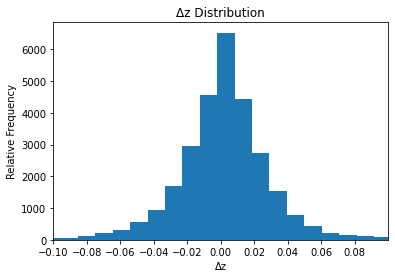

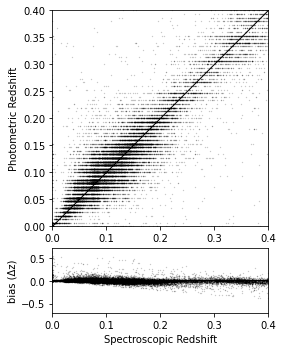

In [ ]:
run_model_with_data('seq',np.shape(X_train[0]),X_train, y_train, X_test,y_test,Nbins,7,name = 'model_001',Augmentation = True,Pooling = True, Dropout = False,batch_size = 128,epochs = 100,validation_split = 0.2,monitor = 'loss')


In [ ]:
#run_model_with_data('Pasquet',np.shape(X_train[0]),X_train, y_train, X_test,y_test,Nbins,7,name = 'model_002',Augmentation = True,Pooling = True, Dropout = False,batch_size = 64,epochs = 100,validation_split = 0.2,monitor = 'loss')


Producing a density plot using the test dataset

Using code from this [paper](https://biprateep.de/encapZulate-1/) for the plot.

908/908 [==============================] - 5s 5ms/step


/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


<Figure size 432x288 with 0 Axes>

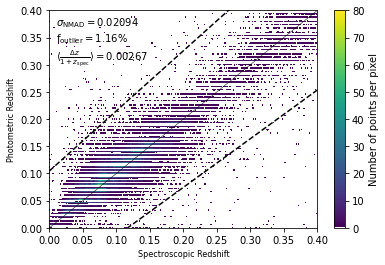

In [ ]:
dens_plot("model_001",X_test, y_test, max_red = 0.4,Nbins = Nbins)

# Visualisation

In [ ]:
name,predictions = model_pretr_pred("model_001",X_test, y_test, Nbins)


908/908 [==============================] - 7s 7ms/step


In [ ]:
!pwd

/content/Photoz_SDSS


In [ ]:
path = "/sps/lsst/users/atheodor/" + "model_001"
model = load_model(path)
model.save("/content/Photoz_SDSS/Photoz_SDSS/pretr_model")
predictions = model.predict(X_test)
red,dz,pred_bias,smad,out_frac = show_metrics(model,X_test,y_test,Nbins)
print_stuff(pred_bias,smad,out_frac)

908/908 [==============================] - 4s 5ms/step
The prediction bias is: 0.0026729951413143843
The Mad Deviation is: 0.02093863391808407
The percentage of outliers is: 0.01156945113972867


0

In [ ]:
np.shape(y_test)

(29042,)

Useful functions from this [tutorial](https://www.youtube.com/watch?v=AACPaoDsd50&t=962s)

In [ ]:
def plot_image(i,predictions_array,true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)#, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  #plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
  #                                     100*np.max(predictions_array),
  #                                    class_names[true_label]),
  #          color = color)

In [ ]:
def plot_value_array(i,predictions_array,true_label):
   predictions_array, true_label = predictions_array[i], int(true_label[i])
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   thisplot = plt.bar(range(Nbins+1),predictions_array,color = "#777777")
   plt.ylim([0,1])

   predicted_label = np.argmax(predictions_array)

   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('green')

###Visualising the predictions of the model

The bars appear red when the estimation is not correct, and the green bar is the correct redshift estimated through spectroscopy.

We do not expect to get the correct estimation every single time, but we expect to get a close estimation.

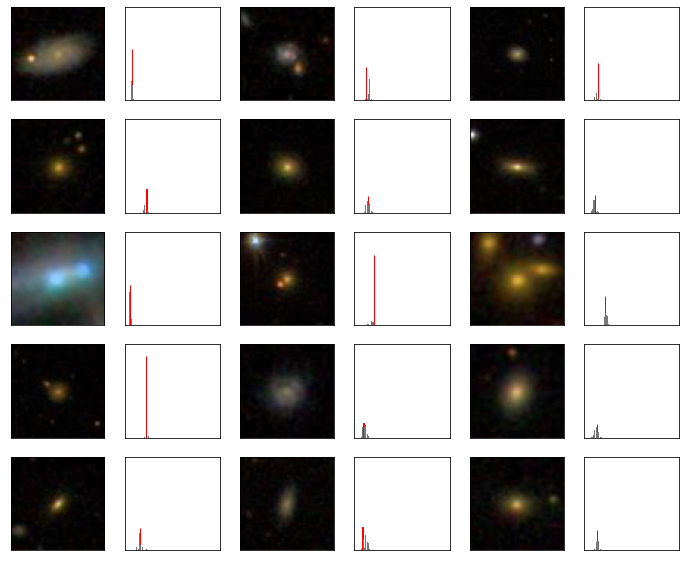

In [ ]:
num_rows = 5
num_cols = 3
num_img = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols,2*num_rows))
for i in range(num_img):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,y_test,X_test)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions,y_test)
plt.show()

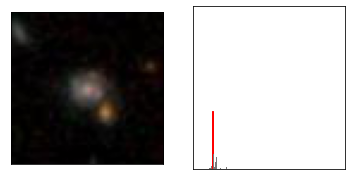

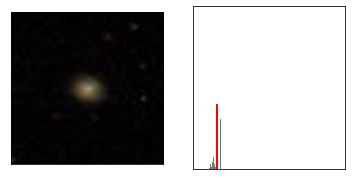

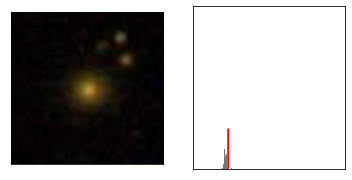

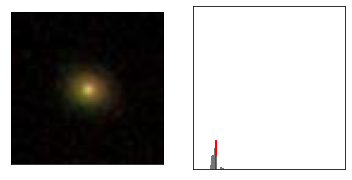

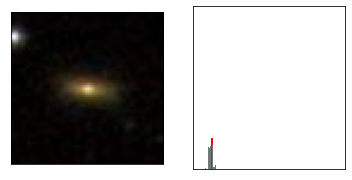

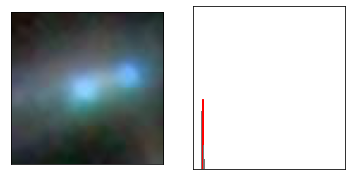

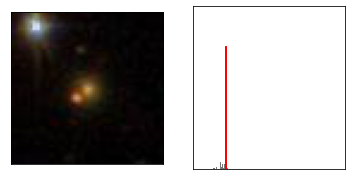

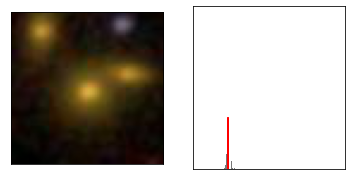

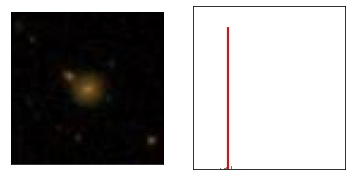

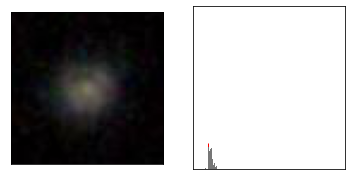

In [ ]:
for i in range(1,11):
  plt.figure(figsize = (6,3))
  plt.subplot(1,2,1)
  plot_image(i,predictions,y_test,X_test)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions, y_test)
  plt.show()